In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)
    

sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.5
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)
).reshape(-1, 28, 28)
x_valid_scaled = scaler.fit_transform(
    x_valid.astype(np.float32).reshape(-1, 1)
).reshape(-1, 28, 28)
x_test_scaled = scaler.fit_transform(
    x_test.astype(np.float32).reshape(-1, 1)
).reshape(-1, 28, 28)

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.BatchNormalization())
    """
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    """
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [6]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='sgd',
    metrics=['accuracy']
)

In [7]:
logdir = '.\dnn-bn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, 'fashion_mnist_model.h5')
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]

In [8]:
history = model.fit(
    x_train_scaled, y_train, 
    epochs=10, 
    validation_data=(x_valid_scaled, y_valid),
    callbacks=callbacks
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 29s 534us/sample - loss: 1.9608 - accuracy: 0.5053 - val_loss: 1.7127 - val_accuracy: 0.7508
Epoch 2/10
55000/55000 [==============================] - 25s 458us/sample - loss: 1.7564 - accuracy: 0.7077 - val_loss: 1.6909 - val_accuracy: 0.7714
Epoch 3/10
55000/55000 [==============================] - 25s 464us/sample - loss: 1.7302 - accuracy: 0.7329 - val_loss: 1.6785 - val_accuracy: 0.7828
Epoch 4/10
55000/55000 [==============================] - 26s 469us/sample - loss: 1.7111 - accuracy: 0.7515 - val_loss: 1.6668 - val_accuracy: 0.7948
Epoch 5/10
55000/55000 [==============================] - 26s 469us/sample - loss: 1.7016 - accuracy: 0.7608 - val_loss: 1.6544 - val_accuracy: 0.8070
Epoch 6/10
55000/55000 [==============================] - 26s 472us/sample - loss: 1.6900 - accuracy: 0.7723 - val_loss: 1.6513 - val_accuracy: 0.8092
Epoch 7/10
55000/55000 [=====================

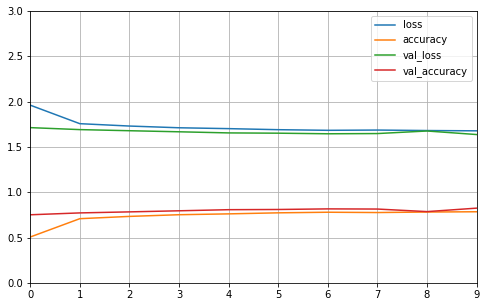

In [9]:
def plot_learing_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

plot_learing_curves(history)

In [10]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 1s 64us/sample - loss: 1.6493 - accuracy: 0.8119s - loss: 1.6497 


[1.6492706069946288, 0.8119]